Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_csv('dataset.csv')

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
df.duplicated().sum()

1

In [37]:
df.drop_duplicates(inplace = True)

In [38]:
df.duplicated().sum()

0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [40]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3 , random_state = 42)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((211, 13), (91, 13), (211,), (91,))

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators =100 , max_depth = 10)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [46]:
y_pred = rfc.predict(X_test)

In [47]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1])

In [48]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8241758241758241
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.85      0.82      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[35  7]
 [ 9 40]]


In [49]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ca          0.150261
thalach     0.126089
oldpeak     0.112495
cp          0.112375
thal        0.105077
age         0.092138
chol        0.078688
trestbps    0.071820
exang       0.050541
slope       0.048662
sex         0.023704
restecg     0.018945
fbs         0.009207
dtype: float64

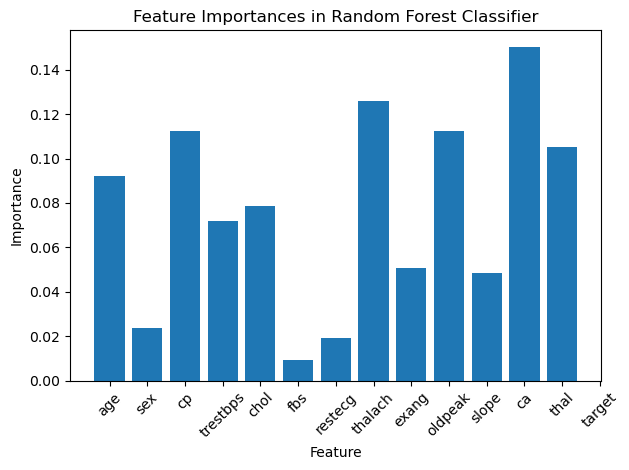

In [50]:
import matplotlib.pyplot as plt

feature_importances = rfc.feature_importances_
feature_names = df.columns

plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Classifier')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)  # Set x-axis ticks and labels
plt.tight_layout()
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[1,10,100],
    'max_depth':[5,10,15],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3]
    
}

In [52]:
cv = GridSearchCV(rfc,param_grid = params , cv = 5)

In [53]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1, 10, 100]})

In [54]:
cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 10}

In [55]:
cv.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=10)

In [56]:
y_pred1 = cv.predict(X_test)

In [57]:
y_pred1

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [58]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8791208791208791
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.91      0.86      0.88        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

[[38  4]
 [ 7 42]]


As we can see, the tuned model has a slightly better performance than the default model. The tuned model has an accuracy of 0.879. The default model has an accuracy of 0.824.

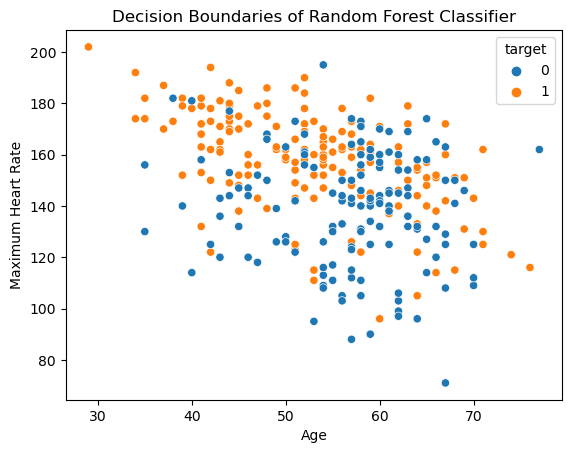

In [70]:
sns.scatterplot(x='age', y='thalach', hue='target', data=df)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()